In [52]:
## importing the useful libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [54]:
print("Current working directory:", os.getcwd())

Current working directory: d:\Users\ABHI VERMA\Desktop\DiabetesMlPrediction\Notebook


In [58]:
## Reading the csv file
data = pd.read_csv(r"D:\Users\ABHI VERMA\Desktop\DiabetesMlPrediction\Dataset\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### All the features are already in the numeric form so we need not to do any kind of conversion

In [60]:
## Checking if there is any null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There is no null data in any of the features, that is something very good it indicates that the data is cleaned already 

In [61]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### from the above table we may observe that min values in the features is 0 in [Pregnanciesc, Glucose,BloodPressure,SkinThickness,Insulin,BMI] and that is something unrealistic, so we will try to replace the 0 values with mean values to get close to the realistic value

<Axes: xlabel='BMI', ylabel='Count'>

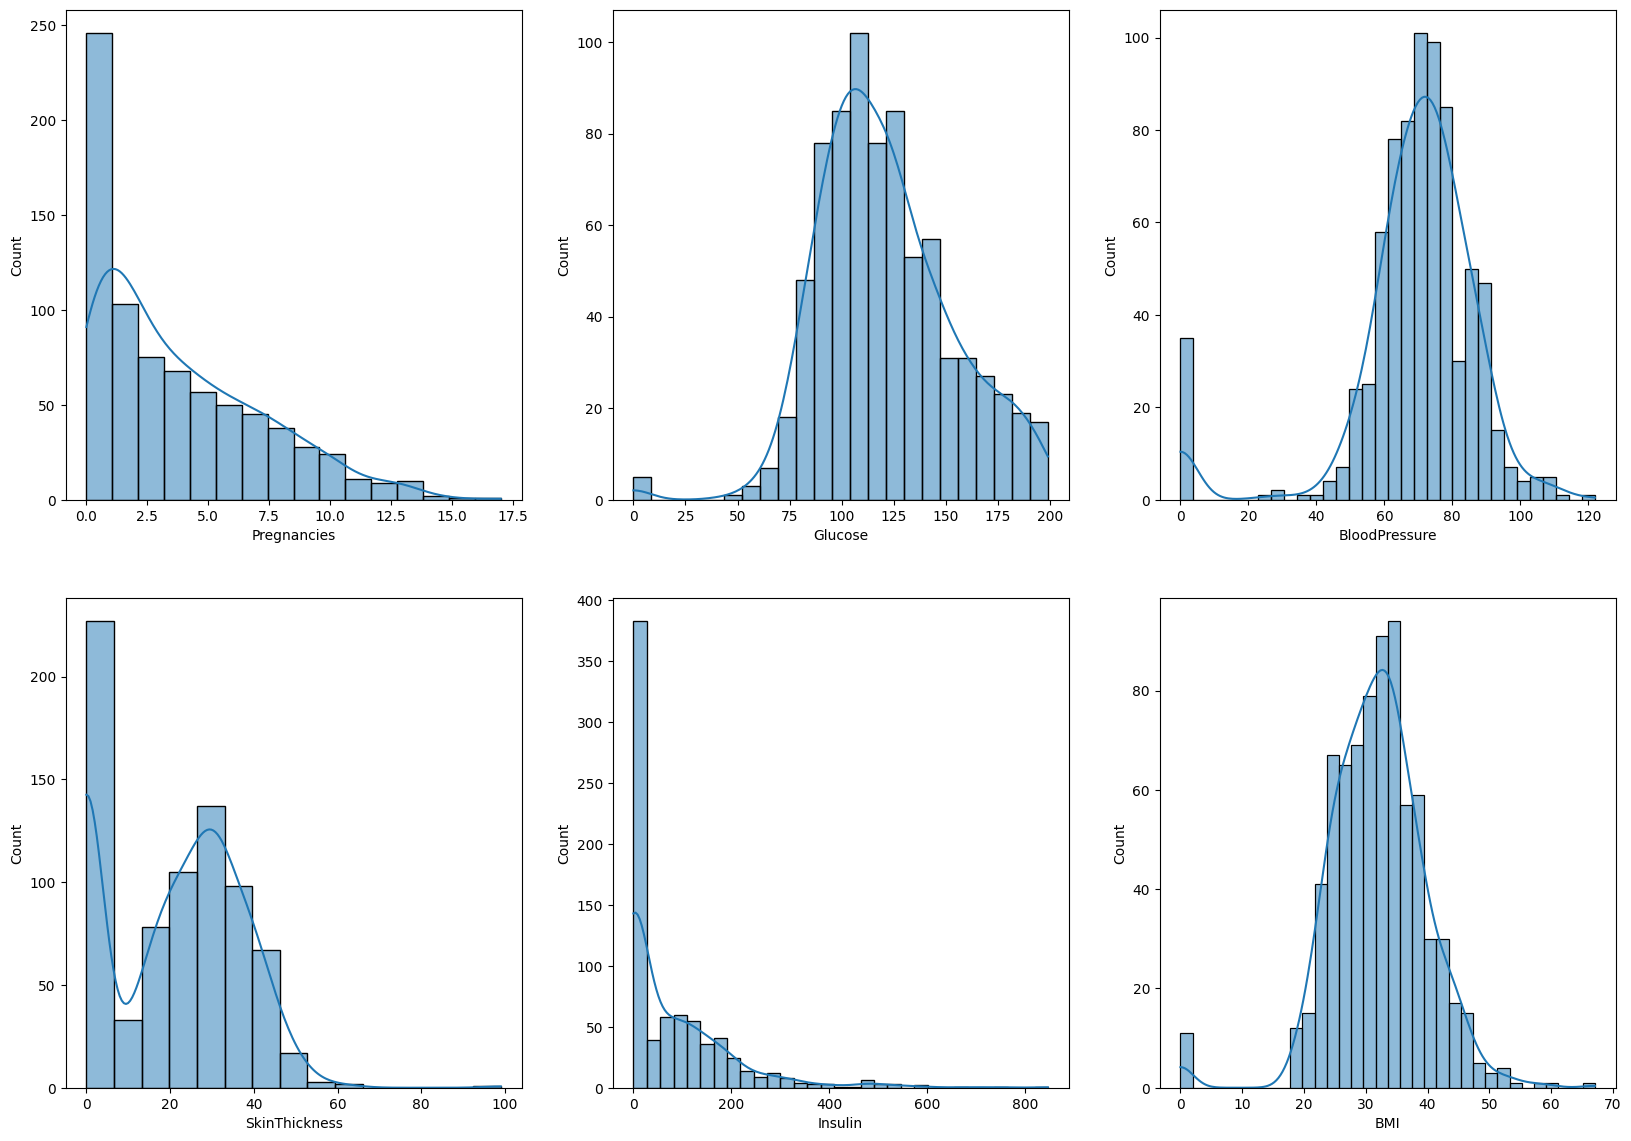

In [62]:
## Checking if the feature have outliers
plt.figure(figsize=(20,14))
plt.subplot(2,3,1)
sns.histplot(data['Pregnancies'],kde=True)
plt.subplot(2,3,2)
sns.histplot(data['Glucose'], kde=True)
plt.subplot(2,3,3)
sns.histplot(data['BloodPressure'], kde=True)
plt.subplot(2,3,4)
sns.histplot(data['SkinThickness'], kde=True)
plt.subplot(2,3,5)
sns.histplot(data['Insulin'], kde=True)
plt.subplot(2,3,6)
sns.histplot(data['BMI'],kde=True)

#### From the above plots we can observe that the following data have significant outliers:
1. Pregnancies
2. SkinThicknes
3. Insulin
4. BMI

So, we will replace the 0s of above feature with median not mean

In [63]:
## Replacing the 0 values with the mean
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].median())
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())

In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

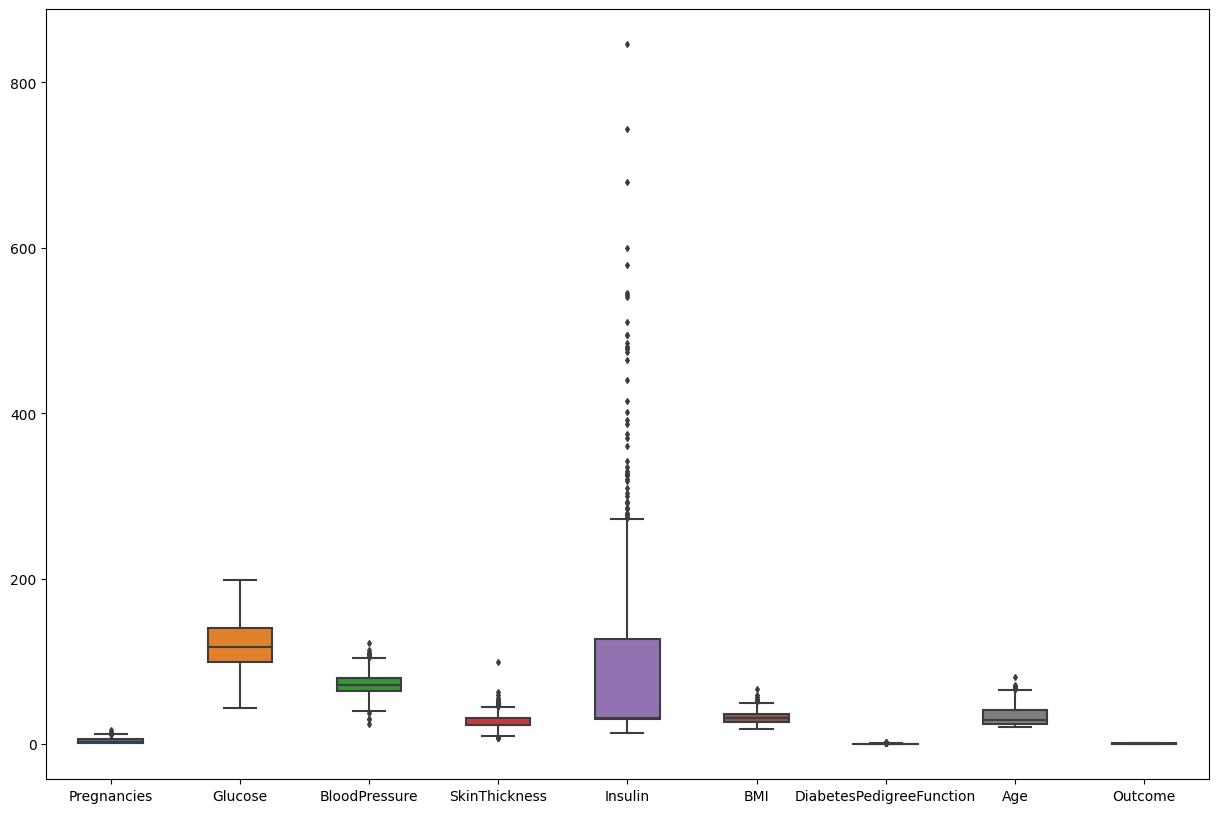

In [65]:
## Now again visualising the outliers in a single frame
fig , ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data , width=0.5 , ax= ax , fliersize=3)

In [66]:
## Segregating the independent and dependent features 
X =  data.drop(columns='Outcome')
y = data['Outcome']

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,3,137.0,40.0,35,168.0,43.1,2.288,33


In [68]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [69]:
## Dividing the data into train and test dataset
xTrain, xTest, yTrain,yTest = train_test_split(X,y,test_size=0.20,random_state=45)

In [70]:
## Now since there are many outliers so we will try to scale out the data 
## Creating a function that will 
import pickle 

def standard_Scaler(xTrain,xTest):
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)

    file = open('standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return xTrainScaled,xTestScaled

In [71]:
xTrainScaled,xTestScaled = standard_Scaler(xTrain,xTest)

In [72]:
logRegression =  LogisticRegression()
logRegression.fit(xTrainScaled,yTrain)

LogisticRegression()

In [73]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C'       : np.logspace(-3,3,7),
    'penalty' : ['l1','l2'],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

In [74]:
clf = GridSearchCV(
                   logRegression,               #model
                   param_grid=parameters,       #parameter
                   scoring='accuracy',          #metrices for scoring
                   cv = 10)                     #number of folds

clf.fit(xTrainScaled,yTrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [75]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [76]:
clf.best_score_

0.7670280274986779

In [77]:
yPredict = clf.predict(xTestScaled)

In [78]:
confusionMatrix = confusion_matrix(yTest,yPredict)
confusionMatrix

array([[88, 16],
       [23, 27]], dtype=int64)

In [79]:
tp = confusionMatrix[0][0]
tn = confusionMatrix[1][1]
fp = confusionMatrix[0][1]
fn = confusionMatrix[1][0]


In [80]:
accuracy_score(yTest , yPredict)
# (tp+tn)/(tp+tn+fp+fn)

0.7467532467532467

In [81]:
# precision_score(yTest,yPredict)
tp/(tp+fp)


0.8461538461538461

In [82]:
#recall
tp/(tp+fn)

0.7927927927927928

In [83]:
import pickle 
file = open('modelForPrediction.pkl','wb')
pickle.dump(logRegression,file)
file.close()